---
title: GSB - S544 Lab 1
author: Karissa Mohr
format:
  html:
    embed-resources: true
    toc: true
    toc-depth: 3
    code-fold: true
echo: true
theme: pulse
---

# Task 1
## 1.1 Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic
### aesthetics being used include x = income, y = life expectancy, color = four region, group = country, size = population

## 1.2 Import the q2data.csv dataset.

In [ ]:
import pandas as pd
df1 = pd.read_csv("q1data.csv")

df1


income  life_exp  ...       eight_regions           world_bank_region
0     1910.0      61.0  ...           asia_west                  South Asia
1    11100.0      78.1  ...         europe_east       Europe & Central Asia
2    11100.0      74.7  ...        africa_north  Middle East & North Africa
3    46900.0      81.9  ...         europe_west       Europe & Central Asia
4     7680.0      60.8  ...  africa_sub_saharan          Sub-Saharan Africa
..       ...       ...  ...                 ...                         ...
192  20400.0      75.4  ...       america_south   Latin America & Caribbean
193   5350.0      73.3  ...   east_asia_pacific         East Asia & Pacific
194   4700.0      67.8  ...           asia_west  Middle East & North Africa
195   3200.0      57.5  ...  africa_sub_saharan          Sub-Saharan Africa
196   2560.0      54.4  ...  africa_sub_saharan          Sub-Saharan Africa

[197 rows x 9 columns]

In [ ]:
from plotnine import geom_point, ggplot, aes, xlim, ylim, scale_x_log10

In [ ]:
region_colors = {
    "americas": "#32CD32",
    "europe": "#FFD700",
    "africa": "#1E90FF",
    "asia": "#FF4C4C"
}

## 1.3 Recreate the plot as best you can using plotnine.

In [ ]:
options.figure_size = (12, 6)
df1_2010 = df1[df1["year"] == 2010]


(ggplot(df1_2010, aes(
        x="income",
        y="life_exp",
        color="four_regions",
        size="population"
    ))
     + geom_point(alpha=0.7)
     + scale_x_log10(
        limits=(500, 64000),
        breaks=[500, 1000, 2000, 4000, 8000,
                16000, 32000, 64000]
    )
    + scale_y_continuous(
        limits=(0, 90),
        breaks=range(0, 91, 10)
    )
    + scale_size_continuous(trans="sqrt", range=[2, 20])
    + scale_color_manual(values=region_colors)
    + labs(
        x="Income",
        y="Life Expectancy"
    )
    + annotate("text", x=5000, y=20, label="2010", size=5000, alpha=0.1)
    + theme_minimal()
)

/usr/local/lib/python3.12/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 11 rows containing missing values.


In [ ]:
from plotnine import geom_histogram, geom_bar, geom_boxplot

## 1.4 What other geometries could you use here besides geom_point?
## Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.
### The Geom Smooth adds a trend line for the relationship between life expectancy and income which makes a pattern/correlation very clear.
### Although, you can't see how it differs between regions or population so it's a very general, vague visualization.

/usr/local/lib/python3.12/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


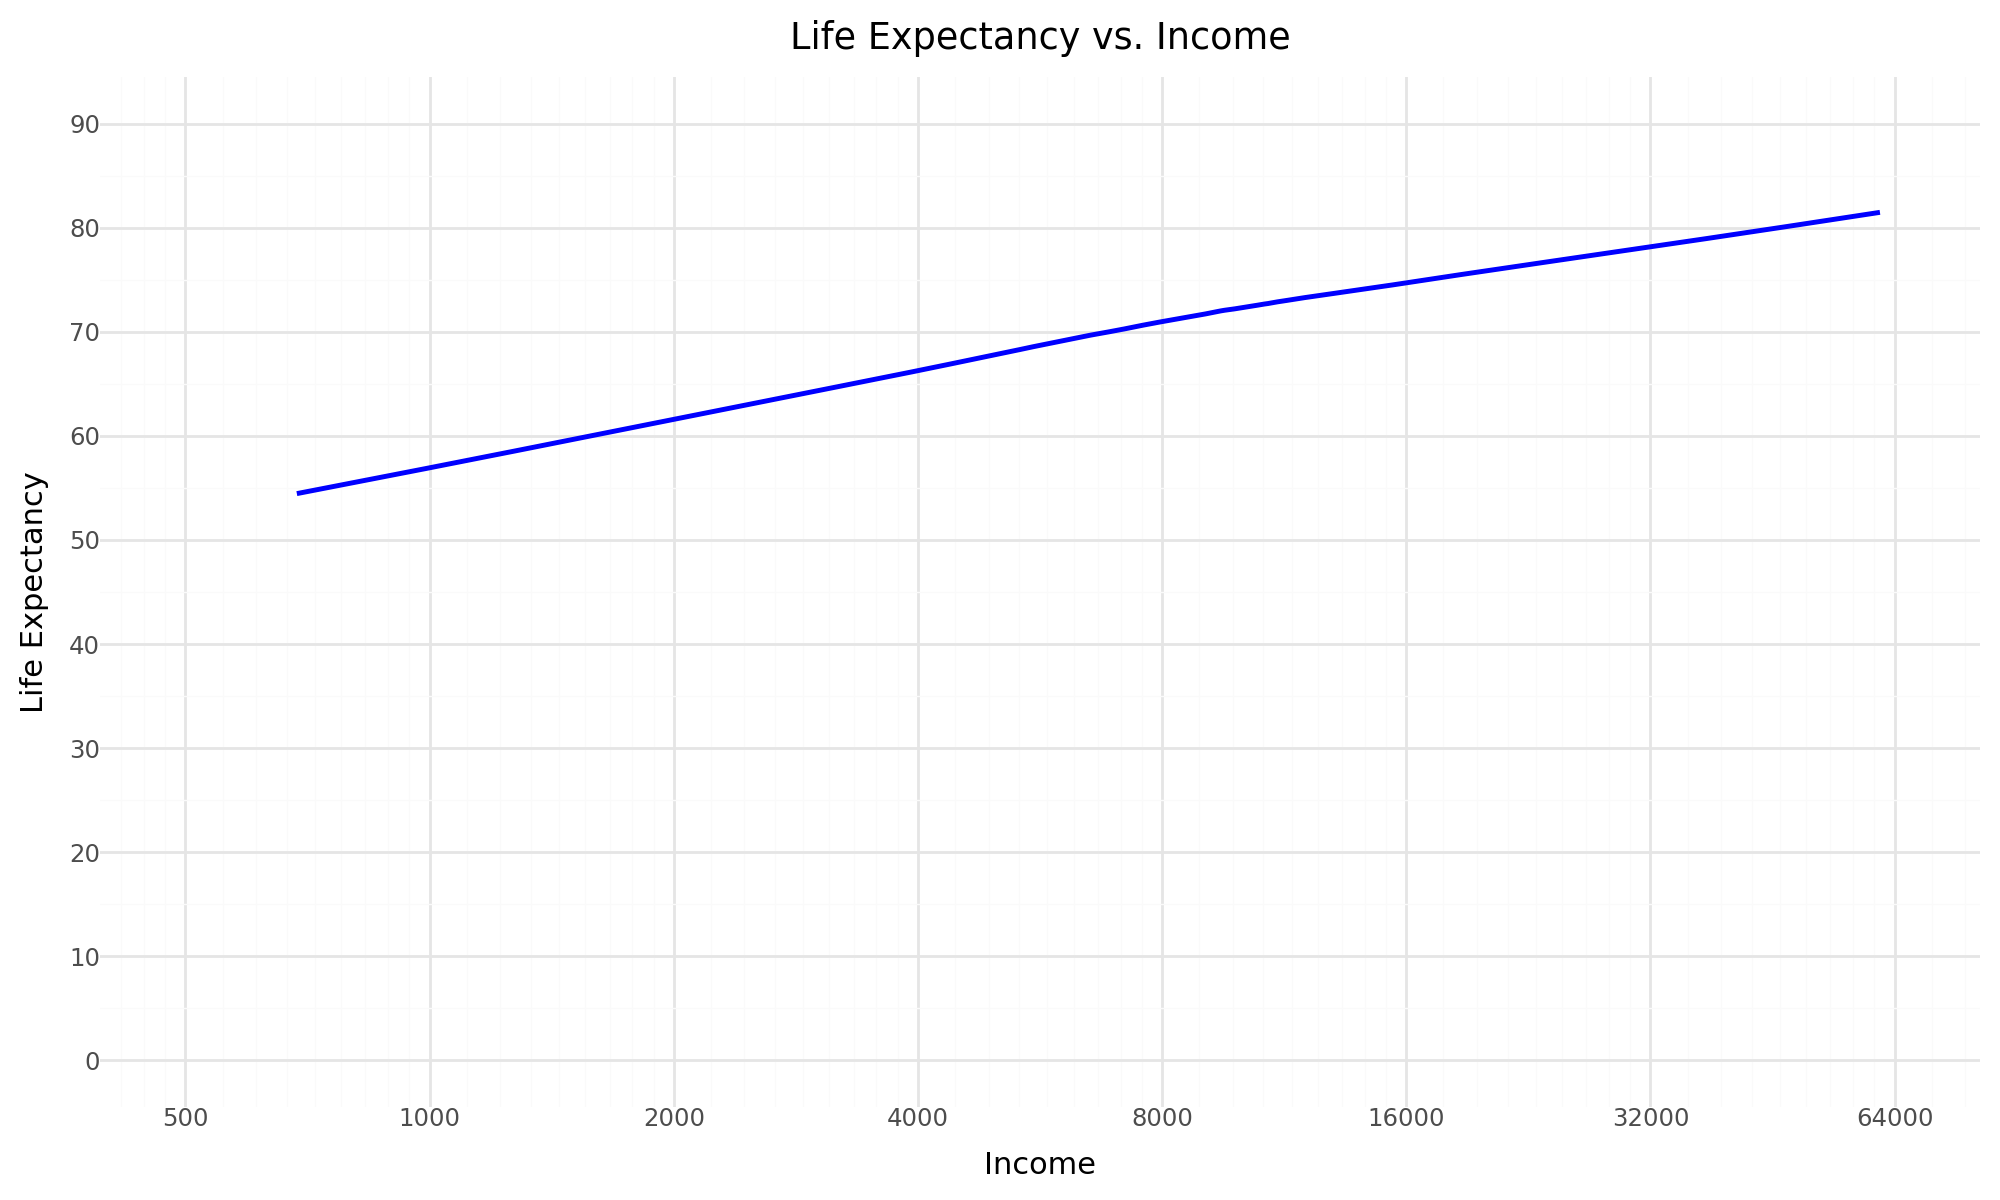

In [ ]:

from plotnine import geom_smooth

options.figure_size = (10, 6)

(ggplot(df1, aes(x="income", y="life_exp"))
    + geom_smooth(se=True, color="blue")
    + scale_x_log10(
        limits=(500, 64000),
        breaks=[500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]
    )
    + scale_y_continuous(limits=(0, 90), breaks=range(0, 91, 10))
    + labs(
        x="Income",
        y="Life Expectancy",
        title="Life Expectancy vs. Income"
    )
    + theme_minimal()
)

# Task 2:
## 2.1 Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.
### aesthetics being used include x = export, y = imports, color = four regions, group = country, size = population

In [ ]:
from plotnine import scale_x_continuous, scale_y_continuous

## 2.2 Import the q2data.csv dataset.

In [ ]:
df2 = pd.read_csv("q2data.csv")

df2

imports  exports energy  year                country four_regions  \
0        NaN      NaN    NaN  1997            Afghanistan         asia   
1       36.7     11.5    427  1997                Albania       europe   
2       22.5     22.6    825  1997                Algeria       africa   
3        NaN      NaN    NaN  1997         American Samoa          NaN   
4        NaN      NaN    434  1997                 Angola       africa   
..       ...      ...    ...   ...                    ...          ...   
201     52.2     44.8    340  1997                Vietnam         asia   
202      NaN      NaN    NaN  1997  Virgin Islands (U.S.)          NaN   
203      NaN      NaN    241  1997                  Yemen          NaN   
204     31.6     24.6    617  1997                 Zambia       africa   
205     45.1     43.4    845  1997               Zimbabwe       africa   

                  six_regions       eight_regions           world_bank_region  
0                  south_asia           asia_west                  South Asia  
1         europe_central_asia         europe_east       Europe & Central Asia  
2    middle_east_north_africa        africa_north  Middle East & North Africa  
3                         NaN                 NaN                         NaN  
4          sub_saharan_africa  africa_sub_saharan          Sub-Saharan Africa  
..                        ...                 ...                         ...  
201         east_asia_pacific   east_asia_pacific         East Asia & Pacific  
202                       NaN                 NaN                         NaN  
203                       NaN                 NaN                         NaN  
204        sub_saharan_africa  africa_sub_saharan          Sub-Saharan Africa  
205        sub_saharan_africa  africa_sub_saharan          Sub-Saharan Africa  

[206 rows x 9 columns]

In [ ]:
print(df2_1997.dtypes)

imports              float64
exports              float64
energy                object
year                   int64
country               object
four_regions          object
six_regions           object
eight_regions         object
world_bank_region     object
dtype: object


In [ ]:
# change energy to numeric
df2["energy"] = pd.to_numeric(df2["energy"], errors="coerce").astype("float64")

## 2.3 Recreate the plot as best you can using plotnine.

In [ ]:
options.figure_size = (12, 6)
df2_1997 = df2[df2["year"] == 1997]
df2_1997 = df2[df2["year"] == 1997].dropna(subset=["exports", "imports", "energy"])

(ggplot(df2_1997, aes(
        x="exports",
        y="imports",
        color="four_regions",
        size="energy"
    ))
    + geom_point(alpha=0.7)
    + scale_x_continuous(limits=(0, 200), breaks=range(0, 201, 20))
    + scale_y_continuous(limits=(0, 500), breaks=range(0, 501, 50))
    + scale_size_continuous(trans="sqrt", range=[2, 20])
    + labs(
        x="Exports",
        y="Imports"
    )
    + annotate("text", x=100, y=250, label="1997", size=5000, alpha=0.1)
    + scale_color_manual(values=region_colors)
    + theme_minimal()
)

## 2.4 What other geometries could you use here besides geom_point?
### Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.
### A Histogram plot doesn't do a good job visualizing the relation between imports and exports. The Histogram is good for counts, not correlation.
### It also doesn't allow us to filter further down by bringing it other factors such as "energy" like a bubble plot allowed us to.

In [ ]:

options.figure_size = (10, 6)

(ggplot(df2_1997, aes(x="exports", fill="four_regions"))
    + geom_histogram(binwidth=10, alpha=0.7)
    + labs(
        x="Exports (% of GDP)",
        y="Count of Countries",
        fill="Four Regions",
        title="Histogram of Exports by Region"
    )
    + theme_minimal()
    + scale_fill_manual(values=region_colors)
)

# Task 3:
## 3.1 Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.
### aesthetics being used include x = individuals that use the internet, y = GDP per capita, color = world regions, group = country, size = income

## 3.2 Import the q3data.csv dataset.

In [ ]:
df3 = pd.read_csv("q3data.csv")

df3

internet_users      gdp   income  year                country  \
0           0.00456    330.0   1190.0  2001            Afghanistan   
1           0.39000   2570.0   6780.0  2001                Albania   
2           1.59000   3770.0   9230.0  2001                Algeria   
3               NaN  10500.0      NaN  2001         American Samoa   
4          11.30000  42600.0  35600.0  2001                Andorra   
..              ...      ...      ...   ...                    ...   
210         1.85000    847.0   3270.0  2001                Vietnam   
211        27.50000  36700.0      NaN  2001  Virgin Islands (U.S.)   
212         0.51900   1190.0   4940.0  2001                  Yemen   
213         0.47800    991.0   2080.0  2001                 Zambia   
214         1.10000   1330.0   3190.0  2001               Zimbabwe   

    four_regions               six_regions       eight_regions  \
0           asia                south_asia           asia_west   
1         europe       europe_central_asia         europe_east   
2         africa  middle_east_north_africa        africa_north   
3            NaN                       NaN                 NaN   
4         europe       europe_central_asia         europe_west   
..           ...                       ...                 ...   
210         asia         east_asia_pacific   east_asia_pacific   
211          NaN                       NaN                 NaN   
212         asia  middle_east_north_africa           asia_west   
213       africa        sub_saharan_africa  africa_sub_saharan   
214       africa        sub_saharan_africa  africa_sub_saharan   

              world_bank_region  
0                    South Asia  
1         Europe & Central Asia  
2    Middle East & North Africa  
3                           NaN  
4         Europe & Central Asia  
..                          ...  
210         East Asia & Pacific  
211                         NaN  
212  Middle East & North Africa  
213          Sub-Saharan Africa  
214          Sub-Saharan Africa  

[215 rows x 9 columns]

In [ ]:
from plotnine import (
    ggplot, aes, geom_point,
    scale_x_continuous, scale_y_log10, scale_size_continuous, scale_color_manual,
    theme_minimal, annotate, labs, options
)

In [ ]:
### drop missing values and filter for 2001
options.figure_size = (12, 6)
df3["four_regions"] = df3["four_regions"].astype("category")
df3 = df3.dropna(subset=["four_regions"])
df3_2001 = df3[df3['year'] == 2001]

## 3.3 Recreate the plot as best you can using plotnine.

/usr/local/lib/python3.12/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 13 rows containing missing values.


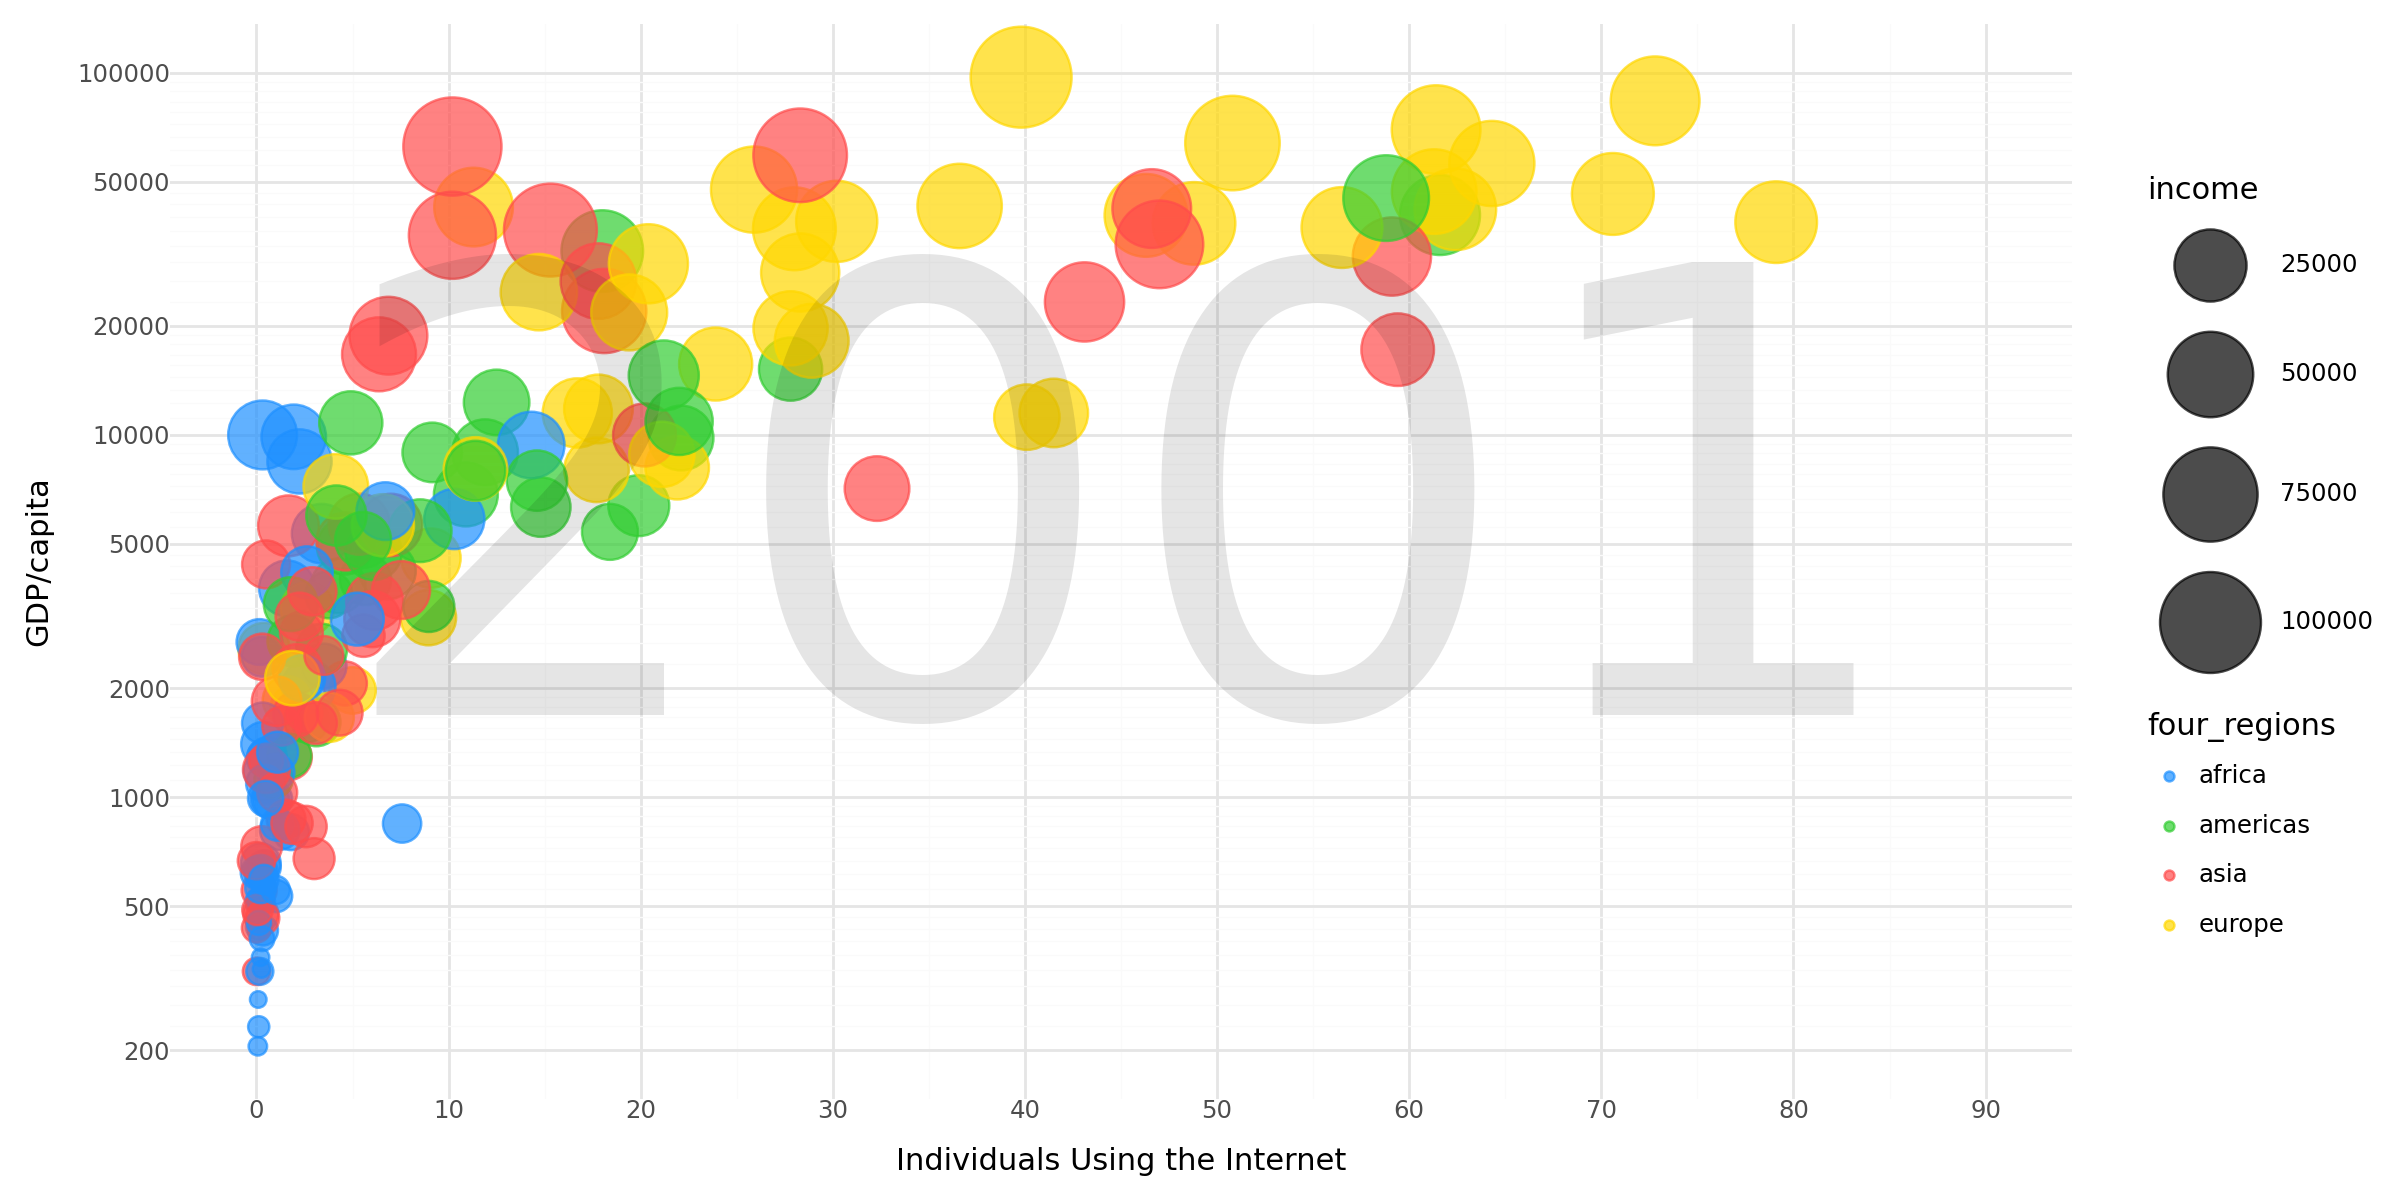

In [ ]:
(ggplot(df3_2001, aes(
        x="internet_users",
        y="gdp",
        color="four_regions",
        size="income"
    ))
+ labs(
    x="Individuals Using the Internet",
    y="GDP/capita"
)
    + geom_point(alpha=0.7)
    + scale_x_continuous(
        limits=(0, 90),
        breaks=range(0, 91, 10)
    )
    + scale_y_log10(
        limits=(200, 100000),
        breaks=[200, 500, 1000, 2000, 5000,
                10000, 20000, 50000, 100000]
    )
    + scale_size_continuous(trans="sqrt", range=[2, 20])
    + scale_color_manual(values=region_colors)
    + theme_minimal()
    + annotate(
        "text", x=45, y=5000, label="2001", size=5000, alpha=0.1

))

## 3.4 What other geometries could you use here besides geom_point?
## Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.
### The Density Graph is a bit difficult to interpret. It may be easier to see where some regions have a lot of overalap but hard to know what that means.
### Also, it doesn't bring in another variable such as GDP per capita, so less detailed too.

/usr/local/lib/python3.12/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_density : Removed 7 rows containing non-finite values.


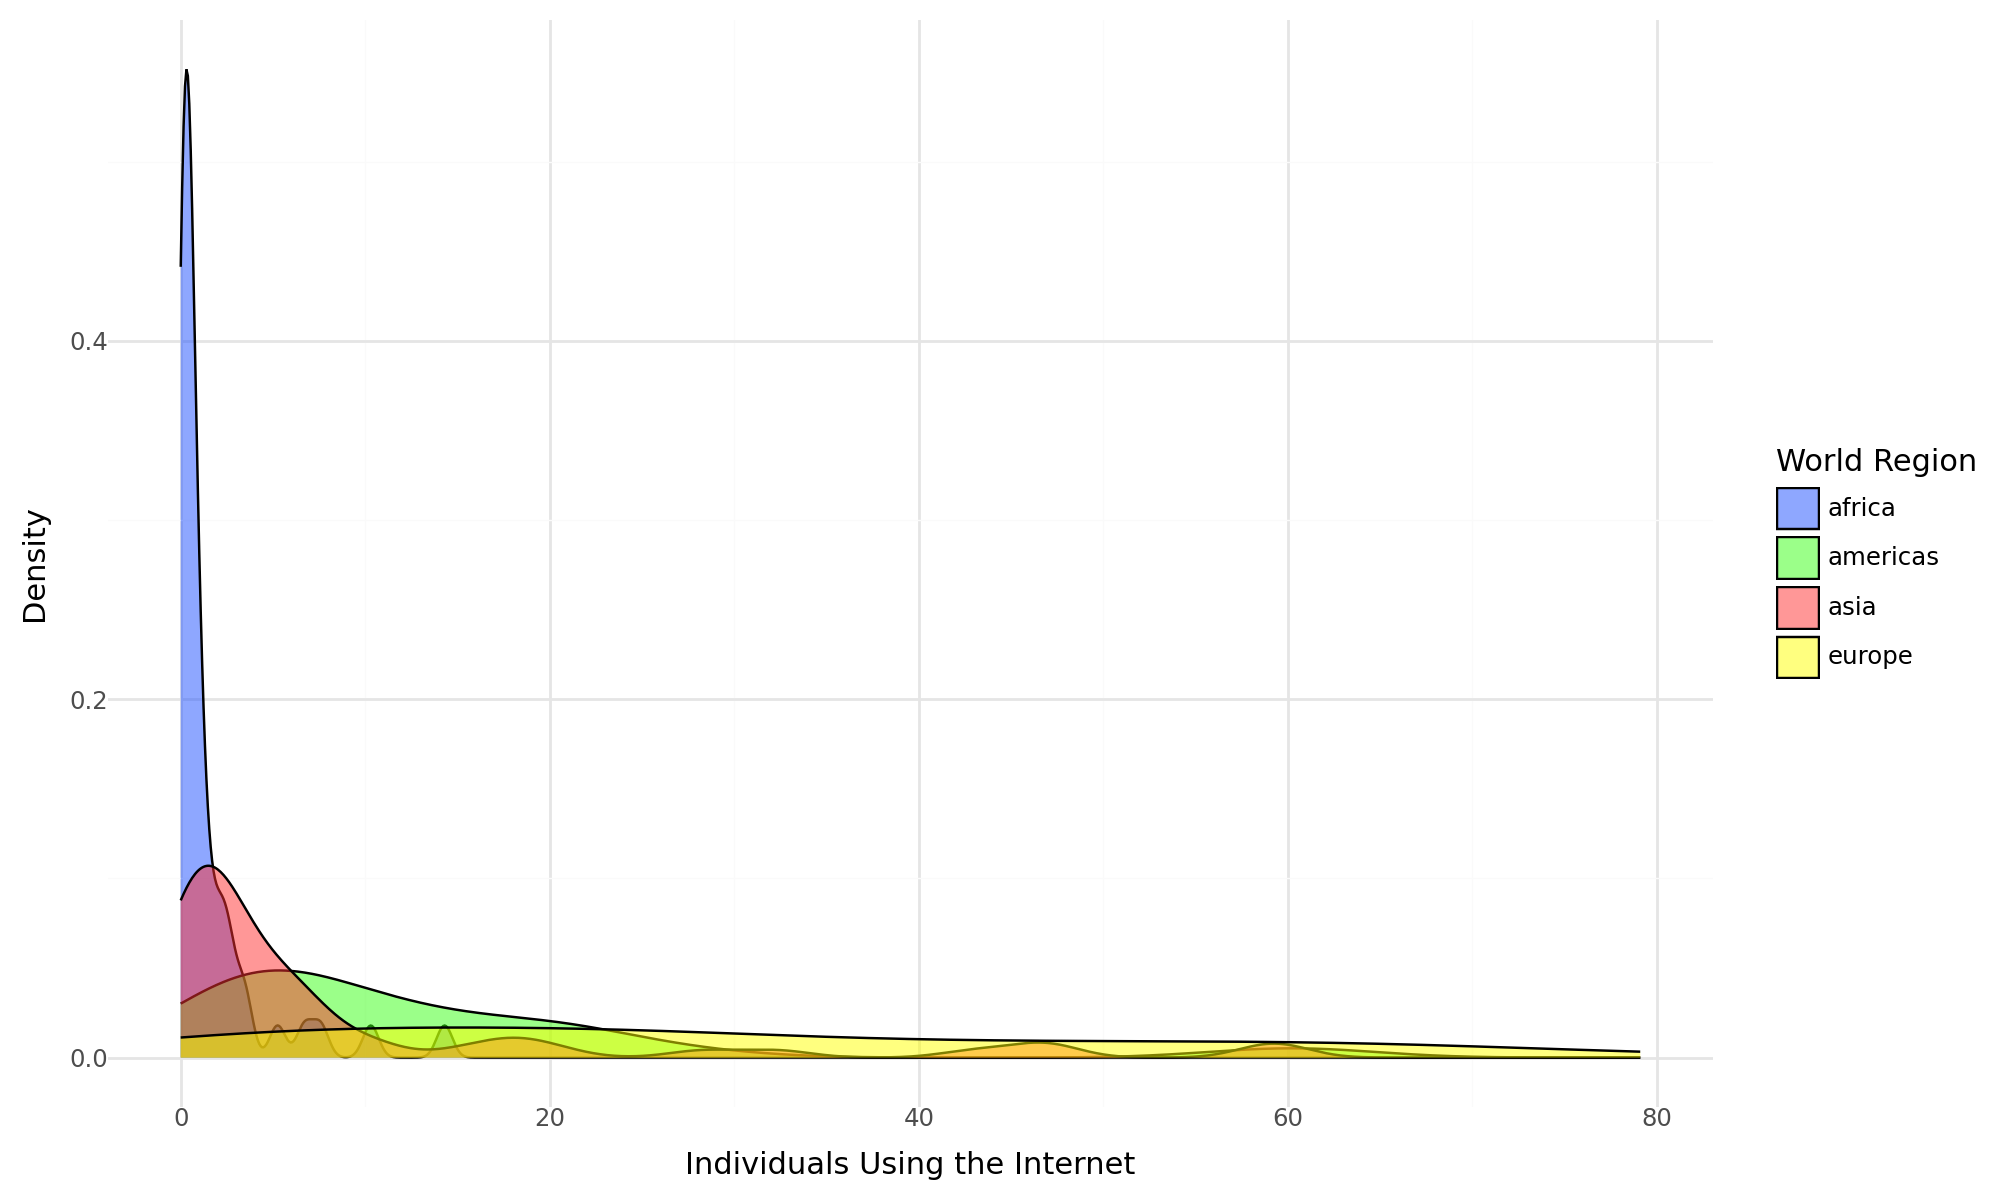

In [ ]:
from plotnine import geom_density, scale_fill_manual

options.figure_size = (10, 6)

(ggplot(df3_2001, aes(x="internet_users", fill="four_regions"))
    + geom_density(alpha=0.5)
    + labs(
        x="Individuals Using the Internet",
        y="Density",
        fill="World Region"
    )
    + theme_minimal()
    + scale_fill_manual(values=region_colors))
